In [4]:
require(data.table)
require(ggplot2)
require(RColorBrewer)
options(repr.plot.width=20, repr.plot.height=15)

In [37]:
Redlist=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/OBIS_RedList_ecoregion_redo.csv")
OBIS=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/OBIS_summary_ecoregion.csv")
coverage=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/coverage_ecoregion_MPA.csv")


In [61]:
richness=merge(Redlist, OBIS,by=c("NAME", "Ecoregion_ID"))
richnesscov=merge(richness, coverage)

In [106]:
colnames(OBIS)

[1] "Ecoregion_ID"                "Region"                     
 [3] "NAME"                        "ER_Observations"            
 [5] "ER_Outside_MPA_Observations" "ER_MPA_Observations"        
 [7] "ER_FP_MPA_Observations"      "Percent_OBS_MPA"            
 [9] "Percent_OBS_FP_MPA"          "ER_Species"                 
[11] "ER_Outside_MPA_Species"      "ER_MPA_Species"             
[13] "ER_FP_MPA_Species"           "Percent_Species_MPA"        
[15] "Percent_Species_FP_MPA"      "ER_Datasets"                
[17] "ER_Outside_MPA_Datasets"     "ER_MPA_Datasets"            
[19] "ER_FP_MPA_Datasets"          "Percent_Datasets_MPA"       
[21] "Percent_Datasets_FP_MPA"

In [9]:
richnesscov$NAME

[1] "Acadian Atlantic"                "Columbian Pacific"              
 [3] "Guam and Mariannas"              "Gulf Stream"                    
 [5] "Hawaiian Archipelago"            "Howland and Baker Islands"      
 [7] "Jarvis Island"                   "Montereyan Pacific Transition"  
 [9] "Northern Gulf of Mexico"         "Northern Gulf Stream Transition"
[11] "Palmyra Atoll"                   "Alaskan/Fjordland Pacific"      
[13] "South Florida/Bahamian Atlantic" "Southern Californian Pacific"   
[15] "Southern Gulf of Mexico"         "Virginian Atlantic"             
[17] "Wake Island"                     "Aleutian Archipelago"           
[19] "American Samoa"                  "Arctic Basin"                   
[21] "Beaufort/Chukchi Seas"           "Bering Sea"                     
[23] "Caribbean Sea"                   "Carolinian Atlantic"

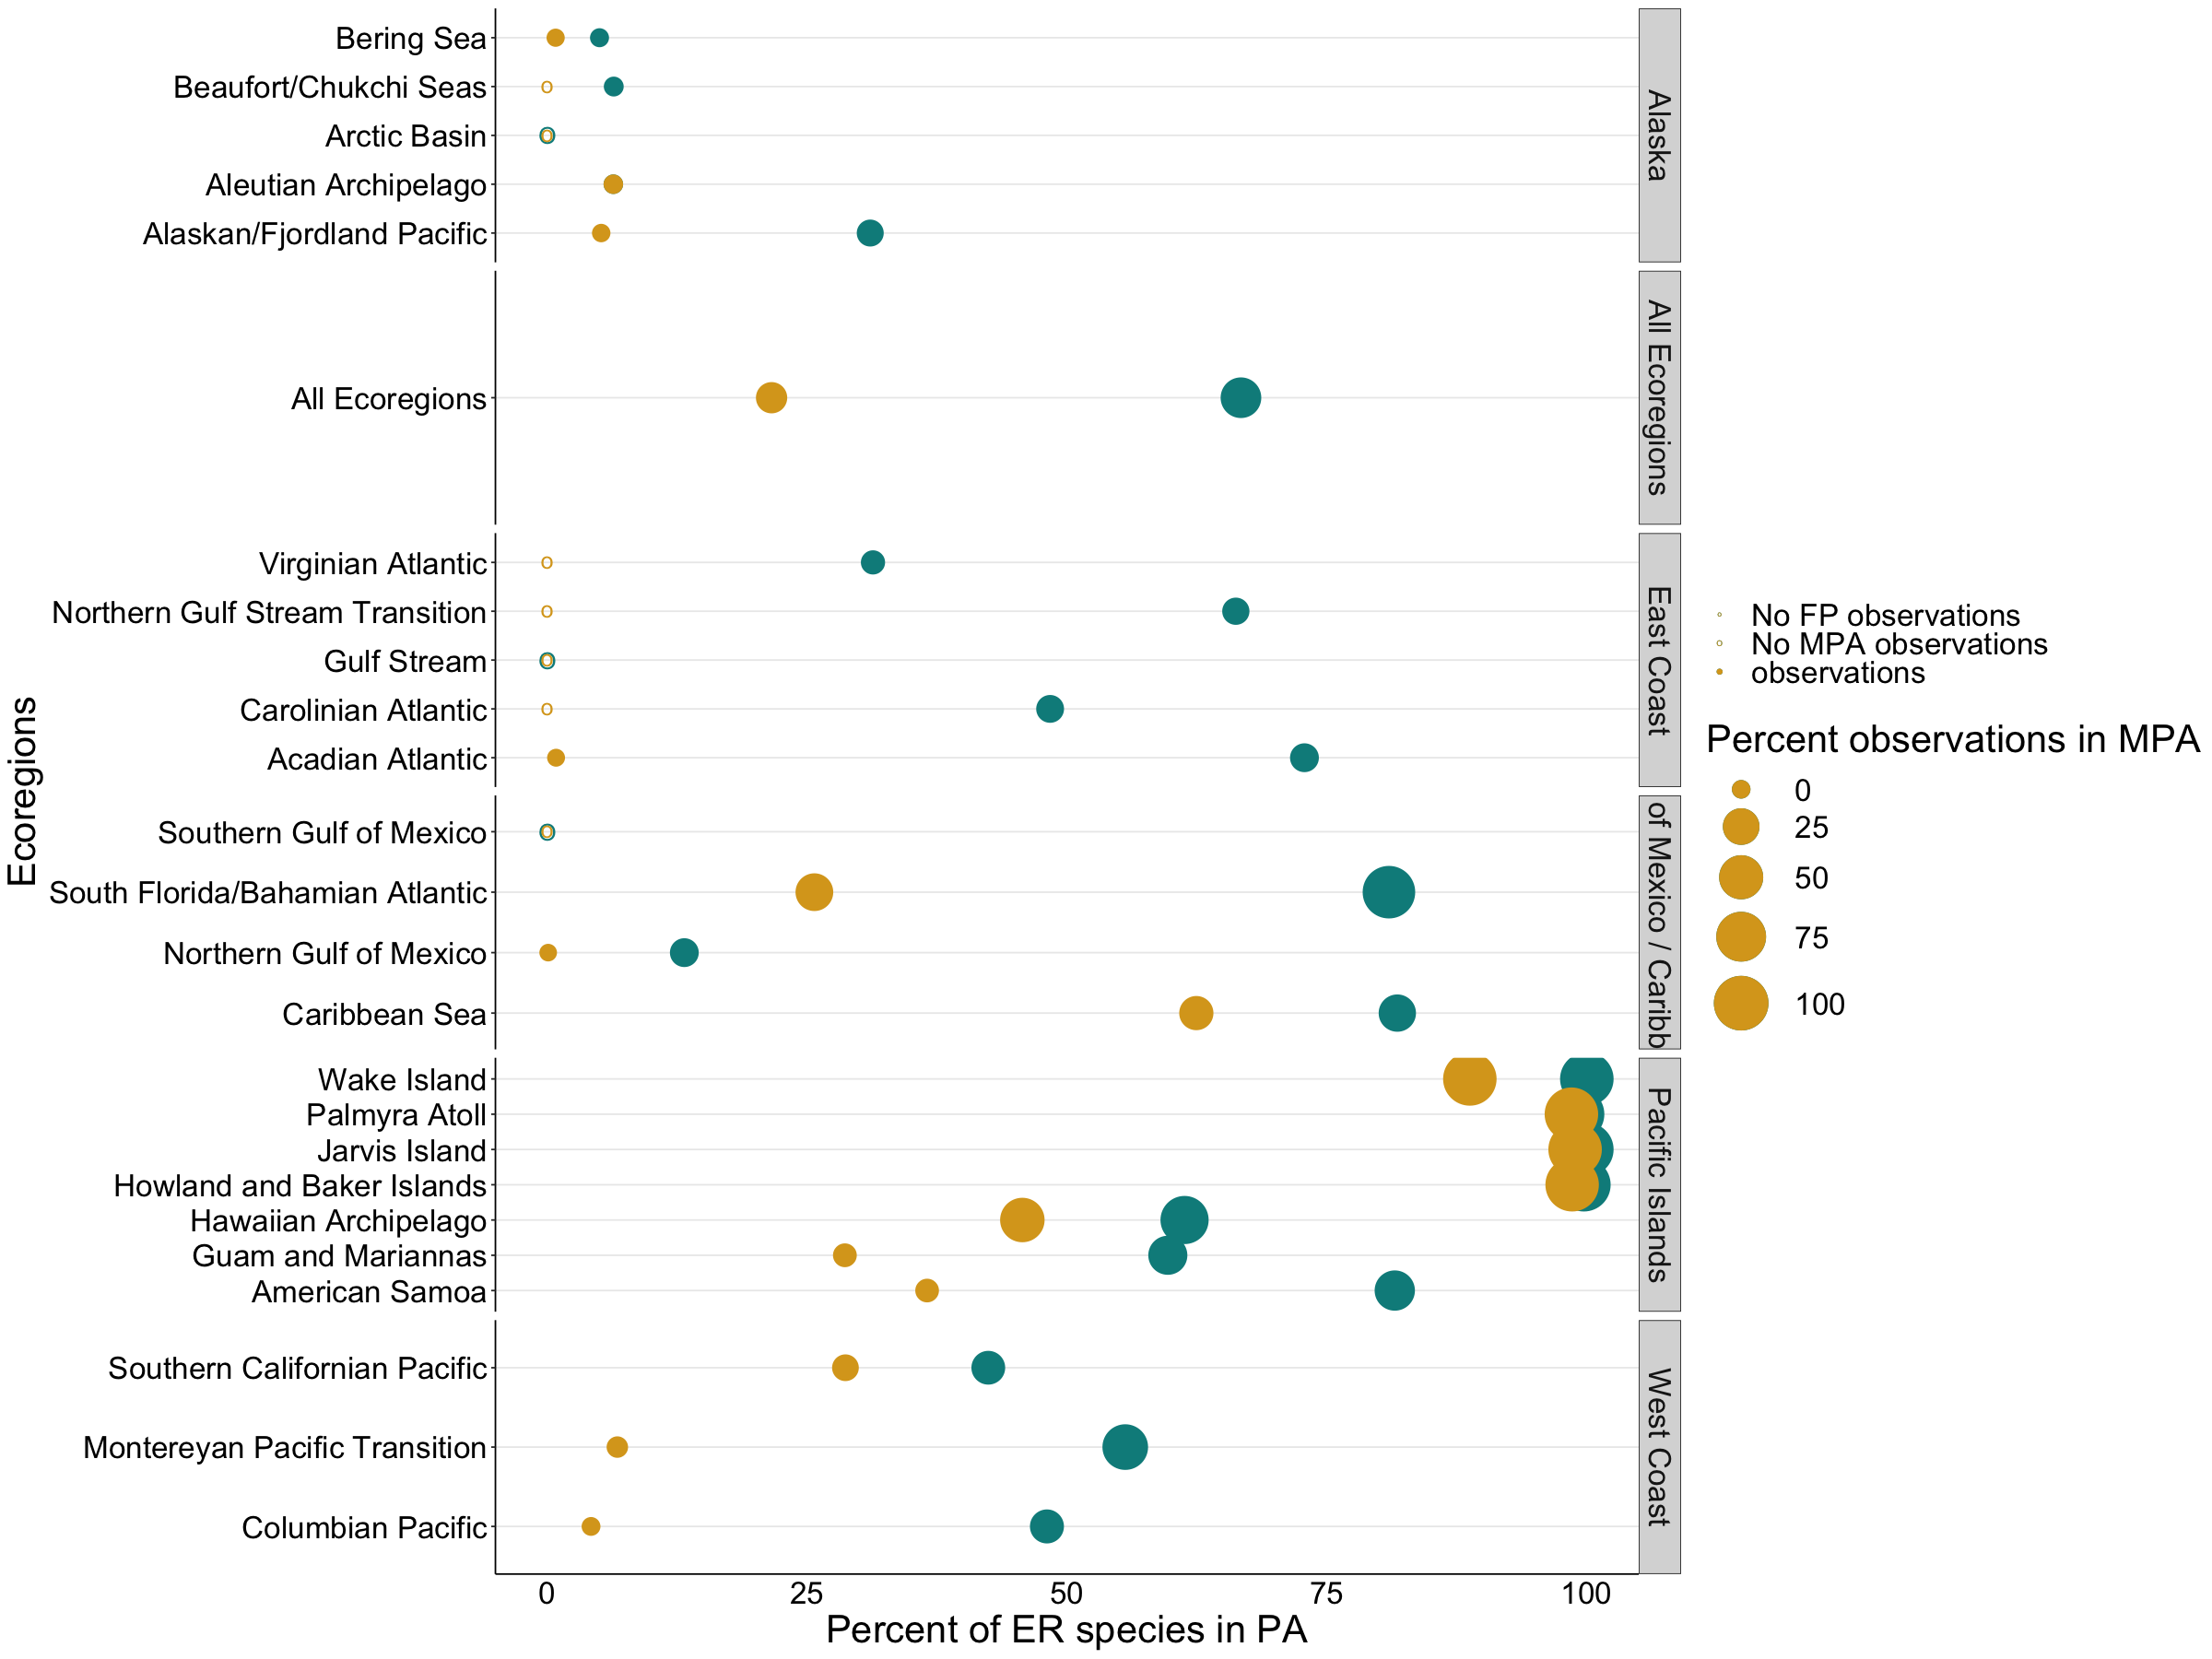

In [63]:
ggplot(richnesscov ) +
    geom_point(color="cyan4", aes(x = Percent_Species_MPA, y = NAME, size= Percent_OBS_MPA, shape=ifelse(Percent_OBS_MPA==0, "No MPA observations", "observations")))+
    geom_point(color="goldenrod", aes(x = Percent_Species_FP_MPA, y = NAME, size=Percent_OBS_FP_MPA, shape=ifelse(Percent_OBS_FP_MPA==0, "No FP observations", "observations")))+
scale_size_continuous(range = c(5, 16))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Percent of ER species in PA", shape="", size="Percent observations in MPA")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")
       

In [114]:
head(richnesscov)

,NAME,Ecoregion_ID,X,ER_Species.x,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,Percent_Redlist_Species_MPA,Percent_Redlist_Species_FP_MPA,dif_percent_obs_cov,dif_percent_FP_obs_cov,dif_percent_Redlist_obs_cov,dif_percent_Redlist_FP_obs_cov,MPA_species_area,FP_MPA_species_area,MPA_Redlist_species_area,FP_MPA_Redlist_species_area
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Acadian Atlantic,1,0,600,85551,44,6463,29,46,3,⋯,65.90909,6.818182,5.148383,0.008384824,2.7721958,-4.7285932,0.090686265,0.959200148,6.018082e-03,0.5755200889
2,Alaskan/Fjordland Pacific,2,1,425,4018,14,391,7,2,2,⋯,50.00000,14.285714,6.482853,0.017390453,9.3184223,-0.3630112,0.018795839,0.023369068,9.967490e-04,0.0021244608
3,Aleutian Archipelago,3,2,268,781,10,5,1,5,1,⋯,10.00000,10.000000,-1.001674,-0.831357156,-0.6871021,-0.6871021,0.006917345,0.008006038,4.069027e-04,0.0004709434
4,All Ecoregions,0,24,6970,515741,163,98494,127,26928,68,⋯,77.91411,41.717791,15.238613,11.481697419,-6.9696916,-20.8460365,0.001459334,0.003920095,3.985707e-05,0.0001773563
5,American Samoa,4,3,709,640,23,239,18,23,5,⋯,78.26087,21.739130,31.325017,2.941365679,28.6479978,-5.1020022,0.016339839,34.471009142,5.088531e-04,0.6654634970
6,Arctic Basin,5,4,108,2095,3,NA,NA,NA,NA,⋯,NA,NA,0.000000,0.000000000,NA,NA,NaN,NaN,NA,NA


In [11]:
richnesscov$species_obs=richnesscov$

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: richnesscov$species_obs=richnesscov$
   ^


In [12]:
colnames(richnesscov)

[1] "Ecoregion_ID"                "NAME"                       
 [3] "ER_Species"                  "X"                          
 [5] "ER_RedList_Obs"              "ER_RedList_Species"         
 [7] "MPA_RedList_Obs"             "MPA_RedList_Species"        
 [9] "FP_MPA_RedList_Obs"          "FP_MPA_RedList_Species"     
[11] "Region"                      "ER_Observations"            
[13] "ER_Outside_MPA_Observations" "ER_MPA_Observations"        
[15] "ER_FP_MPA_Observations"      "Percent_OBS_MPA"            
[17] "Percent_OBS_FP_MPA"          "ER_Outside_MPA_Species"     
[19] "ER_MPA_Species"              "ER_FP_MPA_Species"          
[21] "Percent_Species_MPA"         "Percent_Species_FP_MPA"     
[23] "ER_Datasets"                 "ER_Outside_MPA_Datasets"    
[25] "ER_MPA_Datasets"             "ER_FP_MPA_Datasets"         
[27] "Percent_Datasets_MPA"        "Percent_Datasets_FP_MPA"    
[29] "ER.Area"                     "MPA.Coverage.Area"          
[31] "FP.MPA.Coverage.Area"        "PCT.Covered.by.MPA"         
[33] "PCT.Covered.by.FP.MPA"

In [64]:
#make percent redlist observations
richnesscov$Percent_Redlist_OBS_MPA=(richnesscov$MPA_RedList_Obs/richnesscov$ER_RedList_Obs)*100
richnesscov$Percent_Redlist_OBS_FP_MPA=(richnesscov$FP_MPA_RedList_Obs/richnesscov$ER_RedList_Obs)*100

In [65]:
#make percent redlist species
richnesscov$Percent_Redlist_Species_MPA=(richnesscov$MPA_RedList_Species/richnesscov$ER_RedList_Species)*100
richnesscov$Percent_Redlist_Species_FP_MPA=(richnesscov$FP_MPA_RedList_Species/richnesscov$ER_RedList_Species)*100


In [66]:
richnesscov$Percent_Redlist_Species_MPA

[1]  65.90909  50.00000  10.00000  77.91411  78.26087        NA  60.00000
 [8]  17.64706  52.00000  21.21212  51.61290  57.57576        NA  88.23529
[15] 100.00000 100.00000  72.22222  35.48387  55.93220 100.00000  87.50000
[22]  53.12500        NA  48.61111 100.00000

In [67]:
richnesscov[richnesscov$MPA_RedList_Obs>richnesscov$PCT.Covered.by.MPA,]

,NAME,Ecoregion_ID,X,ER_Species.x,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,Percent_Datasets_FP_MPA,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,Percent_Redlist_OBS_MPA,Percent_Redlist_OBS_FP_MPA,Percent_Redlist_Species_MPA,Percent_Redlist_Species_FP_MPA
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Acadian Atlantic,1,0,600,85551,44,6463,29,46,3,⋯,5.263158,100762.16,4818.8113,5.212676e+00,4.7823623,0.005173248,7.5545581,0.05376910,65.90909,6.818182
2,Alaskan/Fjordland Pacific,2,1,425,4018,14,391,7,2,2,⋯,9.589041,1701319.78,7022.8311,9.414154e+02,0.4127872,0.055334416,9.7312096,0.04977601,50.00000,14.285714
3,Aleutian Archipelago,3,2,268,781,10,5,1,5,1,⋯,20.000000,185156.13,2457.5902,2.123397e+03,1.3273070,1.146814569,0.6402049,0.64020487,10.00000,10.000000
4,All Ecoregions,0,24,6970,515741,163,98494,127,26928,68,⋯,27.299703,12223708.27,3186386.0530,3.834091e+05,26.0672619,3.136601941,19.0975703,5.22122538,77.91411,41.717791
5,American Samoa,4,3,709,640,23,239,18,23,5,⋯,57.142857,406792.48,35373.6660,7.513560e+00,8.6957522,0.001847025,37.3437500,3.59375000,78.26087,21.739130
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,Beaufort/Chukchi Seas,6,5,141,8986,5,107,3,NA,NA,⋯,0.000000,276280.28,816.5224,0.000000e+00,0.2955413,0.000000000,1.1907412,NA,60.00000,NA
8,Bering Sea,7,6,379,2706,17,12,3,10,3,⋯,6.250000,1295111.91,12889.5145,4.251868e+02,0.9952433,0.032830118,0.4434590,0.36954915,17.64706,17.647059
9,Caribbean Sea,8,7,362,1281,25,116,13,85,6,⋯,18.518519,212352.33,3576.2788,9.638159e+01,1.6841250,0.045387584,9.0554254,6.63544106,52.00000,24.000000


In [68]:
richnesscov$dif_percent_obs_cov=richnesscov$Percent_OBS_MPA-richnesscov$PCT.Covered.by.MPA

In [69]:
richnesscov$dif_percent_FP_obs_cov=richnesscov$Percent_OBS_FP_MPA-richnesscov$PCT.Covered.by.FP.MPA

In [115]:
print(richnesscov[richnesscov$NAME=="All Ecoregions",])

            NAME Ecoregion_ID  X ER_Species.x ER_RedList_Obs ER_RedList_Species
4 All Ecoregions            0 24         6970         515741                163
  MPA_RedList_Obs MPA_RedList_Species FP_MPA_RedList_Obs FP_MPA_RedList_Species
4           98494                 127              26928                     68
          Region ER_Observations ER_Outside_MPA_Observations
4 All Ecoregions         6808097                     3995953
  ER_MPA_Observations ER_FP_MPA_Observations Percent_OBS_MPA Percent_OBS_FP_MPA
4             2812144                 995228        41.30587            14.6183
  ER_Species.y ER_Outside_MPA_Species ER_MPA_Species ER_FP_MPA_Species
4         6969                   5859           4650              1503
  Percent_Species_MPA Percent_Species_FP_MPA ER_Datasets
4            66.72406               21.56694         674
  ER_Outside_MPA_Datasets ER_MPA_Datasets ER_FP_MPA_Datasets
4                     615             417                184
  Percent_Datasets_M

In [84]:
colnames(richnesscov)

[1] "NAME"                           "Ecoregion_ID"                  
 [3] "X"                              "ER_Species.x"                  
 [5] "ER_RedList_Obs"                 "ER_RedList_Species"            
 [7] "MPA_RedList_Obs"                "MPA_RedList_Species"           
 [9] "FP_MPA_RedList_Obs"             "FP_MPA_RedList_Species"        
[11] "Region"                         "ER_Observations"               
[13] "ER_Outside_MPA_Observations"    "ER_MPA_Observations"           
[15] "ER_FP_MPA_Observations"         "Percent_OBS_MPA"               
[17] "Percent_OBS_FP_MPA"             "ER_Species.y"                  
[19] "ER_Outside_MPA_Species"         "ER_MPA_Species"                
[21] "ER_FP_MPA_Species"              "Percent_Species_MPA"           
[23] "Percent_Species_FP_MPA"         "ER_Datasets"                   
[25] "ER_Outside_MPA_Datasets"        "ER_MPA_Datasets"               
[27] "ER_FP_MPA_Datasets"             "Percent_Datasets_MPA"          
[29] "Percent_Datasets_FP_MPA"        "ER.Area"                       
[31] "MPA.Coverage.Area"              "FP.MPA.Coverage.Area"          
[33] "PCT.Covered.by.MPA"             "PCT.Covered.by.FP.MPA"         
[35] "Percent_Redlist_OBS_MPA"        "Percent_Redlist_OBS_FP_MPA"    
[37] "Percent_Redlist_Species_MPA"    "Percent_Redlist_Species_FP_MPA"
[39] "dif_percent_obs_cov"            "dif_percent_FP_obs_cov"        
[41] "dif_percent_Redlist_obs_cov"    "dif_percent_Redlist_FP_obs_cov"

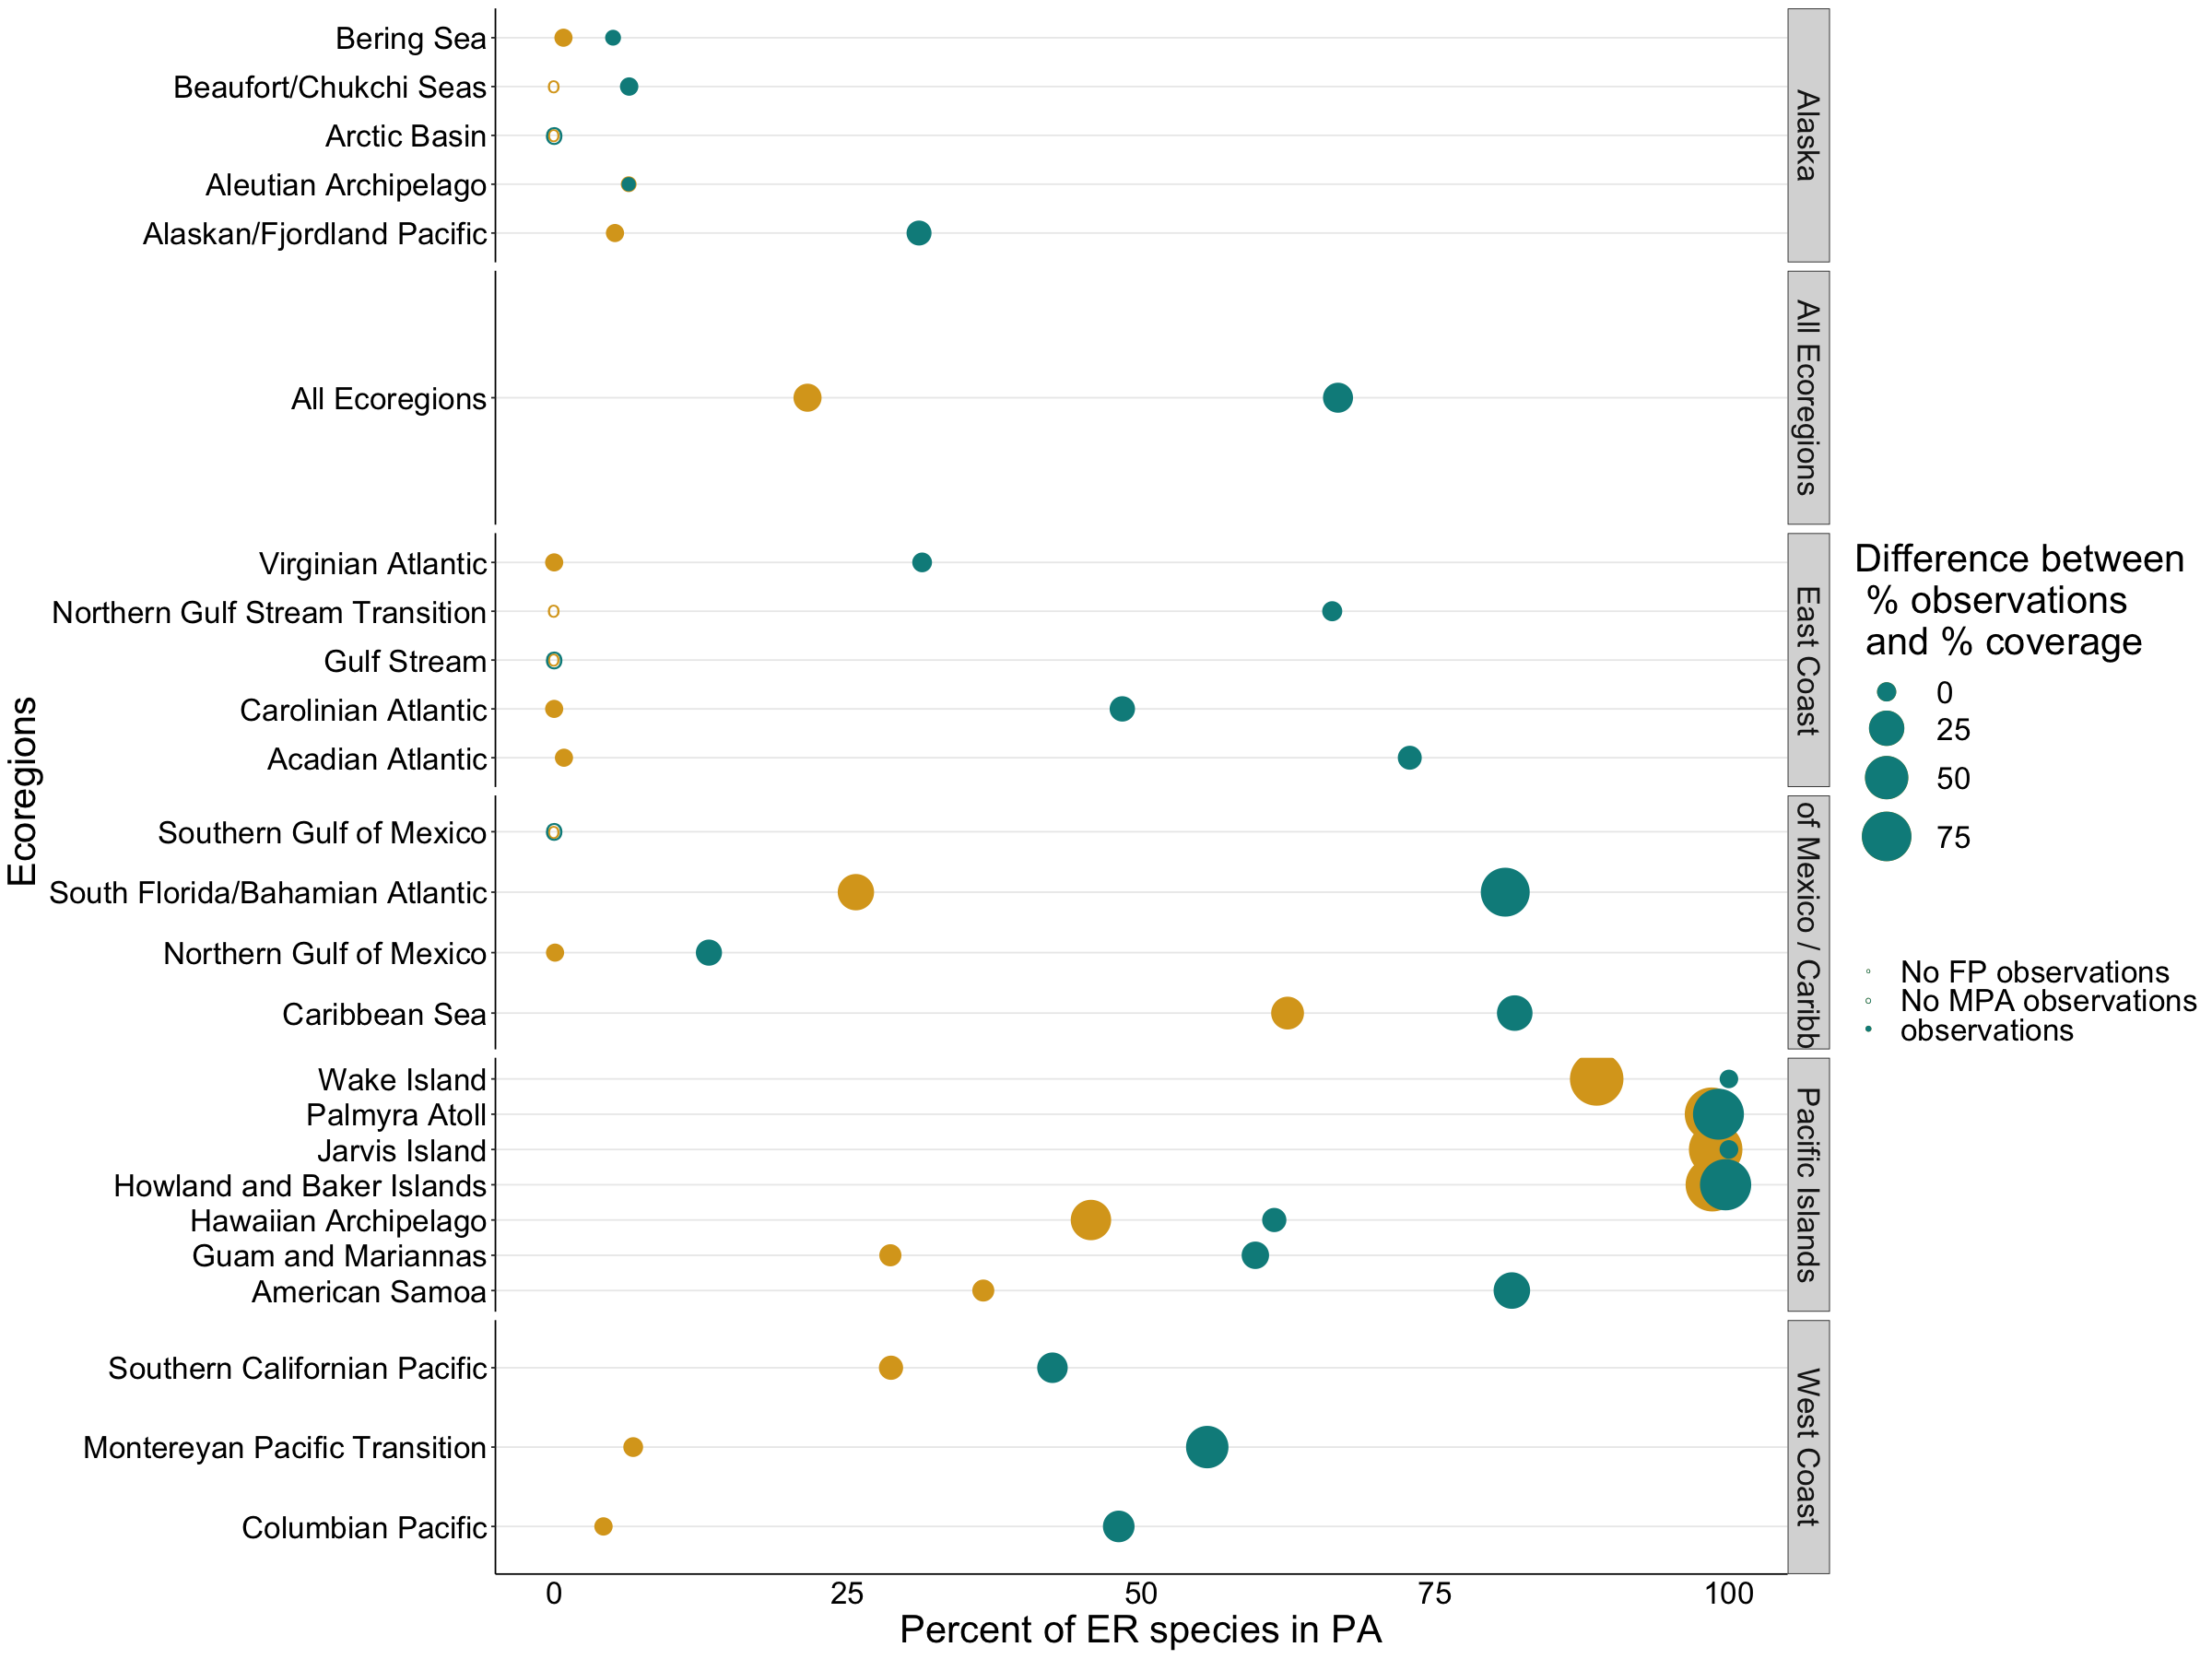

In [72]:
ggplot(richnesscov ) +
    geom_point(color="goldenrod", aes(x = Percent_Species_FP_MPA, y = NAME, size=dif_percent_FP_obs_cov, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")))+   
geom_point(color="cyan4", aes(x = Percent_Species_MPA, y = NAME, size= dif_percent_obs_cov, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")))+
scale_size_continuous(range = c(4, 16))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Percent of ER species in PA", shape="", size="Difference between \n % observations \n and % coverage")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

In [ ]:
## number of species per area in FP vs MPa
richnesscov$MPA_species_area=richnesscov$ER_MPA_Species/richnesscov$MPA.Coverage.Area
richnesscov$FP_MPA_species_area=richnesscov$ER_FP_MPA_Species/richnesscov$FP.MPA.Coverage.Area

In [100]:
exclude <- c("Guam and Mariannas", "American Samoa")
head(exclude)
richnesscov[!richnesscov$NAME %in% exclude,]

[1] "Guam and Mariannas" "American Samoa"

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 5 rows containing missing values (geom_point).”


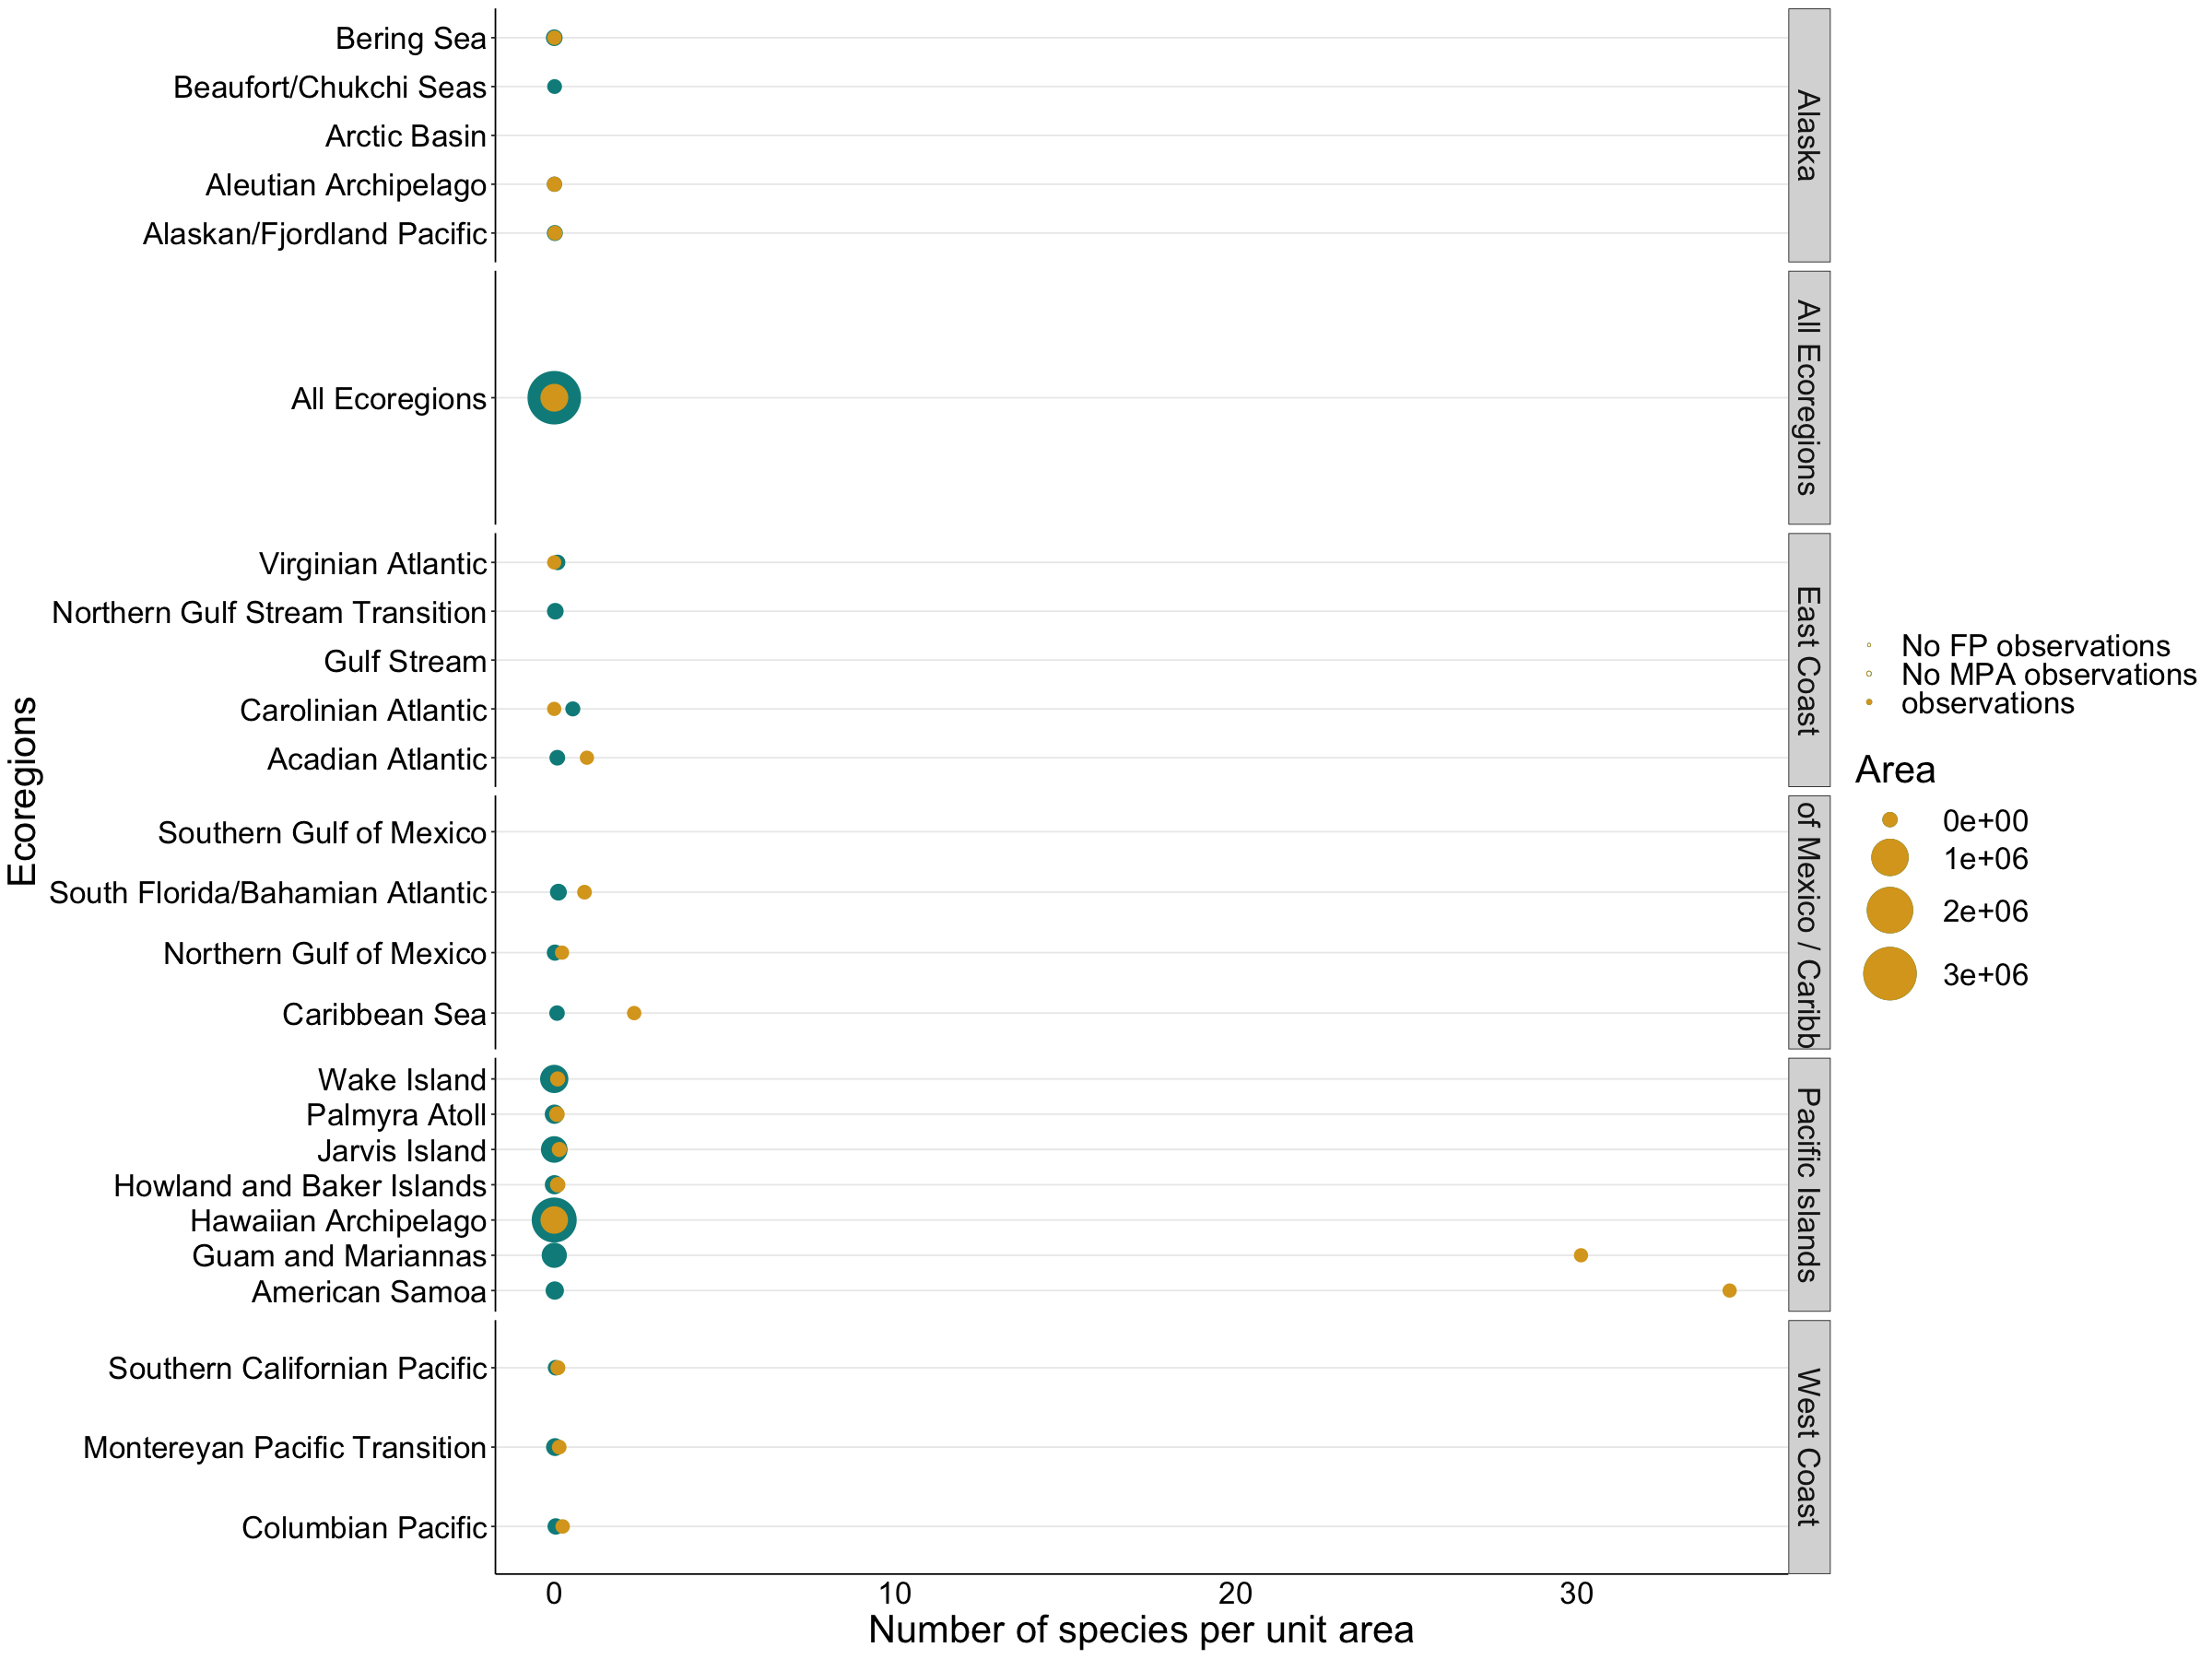

In [105]:
ggplot(richnesscov) +
geom_point(color="cyan4", aes(x = MPA_species_area, y = NAME, size= MPA.Coverage.Area, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")))+
geom_point(color="goldenrod", aes(x = FP_MPA_species_area, y = NAME, size=FP.MPA.Coverage.Area, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")))+   
scale_size_continuous(range = c(4, 16))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Number of species per unit area", shape="", size="Area")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

In [104]:
richnesscov$FP_MPA_species_area

[1]  0.959200148  0.023369068  0.008006038  0.003920095 34.471009142
 [6]          NaN          NaN  0.007055723  2.344846045  0.000000000
[11]  0.247637002 30.112635399          NaN  0.000999996  0.102525114
[16]  0.150097420  0.147052040  0.229763992          NaN  0.080132766
[21]  0.888371590  0.108957518          NaN  0.000000000  0.101238893

In [73]:
richnesscov$dif_percent_Redlist_obs_cov=richnesscov$Percent_Redlist_OBS_MPA-richnesscov$PCT.Covered.by.MPA
richnesscov$dif_percent_Redlist_FP_obs_cov=richnesscov$Percent_Redlist_OBS_FP_MPA-richnesscov$PCT.Covered.by.MPA


In [116]:
richnesscov[richnesscov$dif_percent_obs_cov<0,]

,NAME,Ecoregion_ID,X,ER_Species.x,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,Percent_Redlist_Species_MPA,Percent_Redlist_Species_FP_MPA,dif_percent_obs_cov,dif_percent_FP_obs_cov,dif_percent_Redlist_obs_cov,dif_percent_Redlist_FP_obs_cov,MPA_species_area,FP_MPA_species_area,MPA_Redlist_species_area,FP_MPA_Redlist_species_area
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Aleutian Archipelago,3,2,268,781,10,5,1,5,1,⋯,10.00000,10.00000,-1.0016735,-0.831357156,-0.6871021,-0.6871021,0.006917345,0.008006038,0.0004069027,0.0004709434
8,Bering Sea,7,6,379,2706,17,12,3,10,3,⋯,17.64706,17.64706,-0.8183254,0.004811981,-0.5517843,-0.6256942,0.001474066,0.007055723,0.0002327473,0.0070557230


In [83]:
print(richnesscov[richnesscov$dif_percent_Redlist_obs_cov<25 & richnesscov$Percent_Redlist_Species_MPA>80,])

                     NAME Ecoregion_ID  X ER_Species.x ER_RedList_Obs
NA                   <NA>           NA NA           NA             NA
NA.1                 <NA>           NA NA           NA             NA
14   Hawaiian Archipelago           13 12          801           2524
16          Jarvis Island           15 14          266            827
NA.2                 <NA>           NA NA           NA             NA
25            Wake Island           24 23          231            318
     ER_RedList_Species MPA_RedList_Obs MPA_RedList_Species FP_MPA_RedList_Obs
NA                   NA              NA                  NA                 NA
NA.1                 NA              NA                  NA                 NA
14                   17            1360                  15                670
16                    7             826                   7                740
NA.2                 NA              NA                  NA                 NA
25                    8             

Warning message:
“Removed 7 rows containing missing values (geom_point).”
Warning message:
“Removed 3 rows containing missing values (geom_point).”


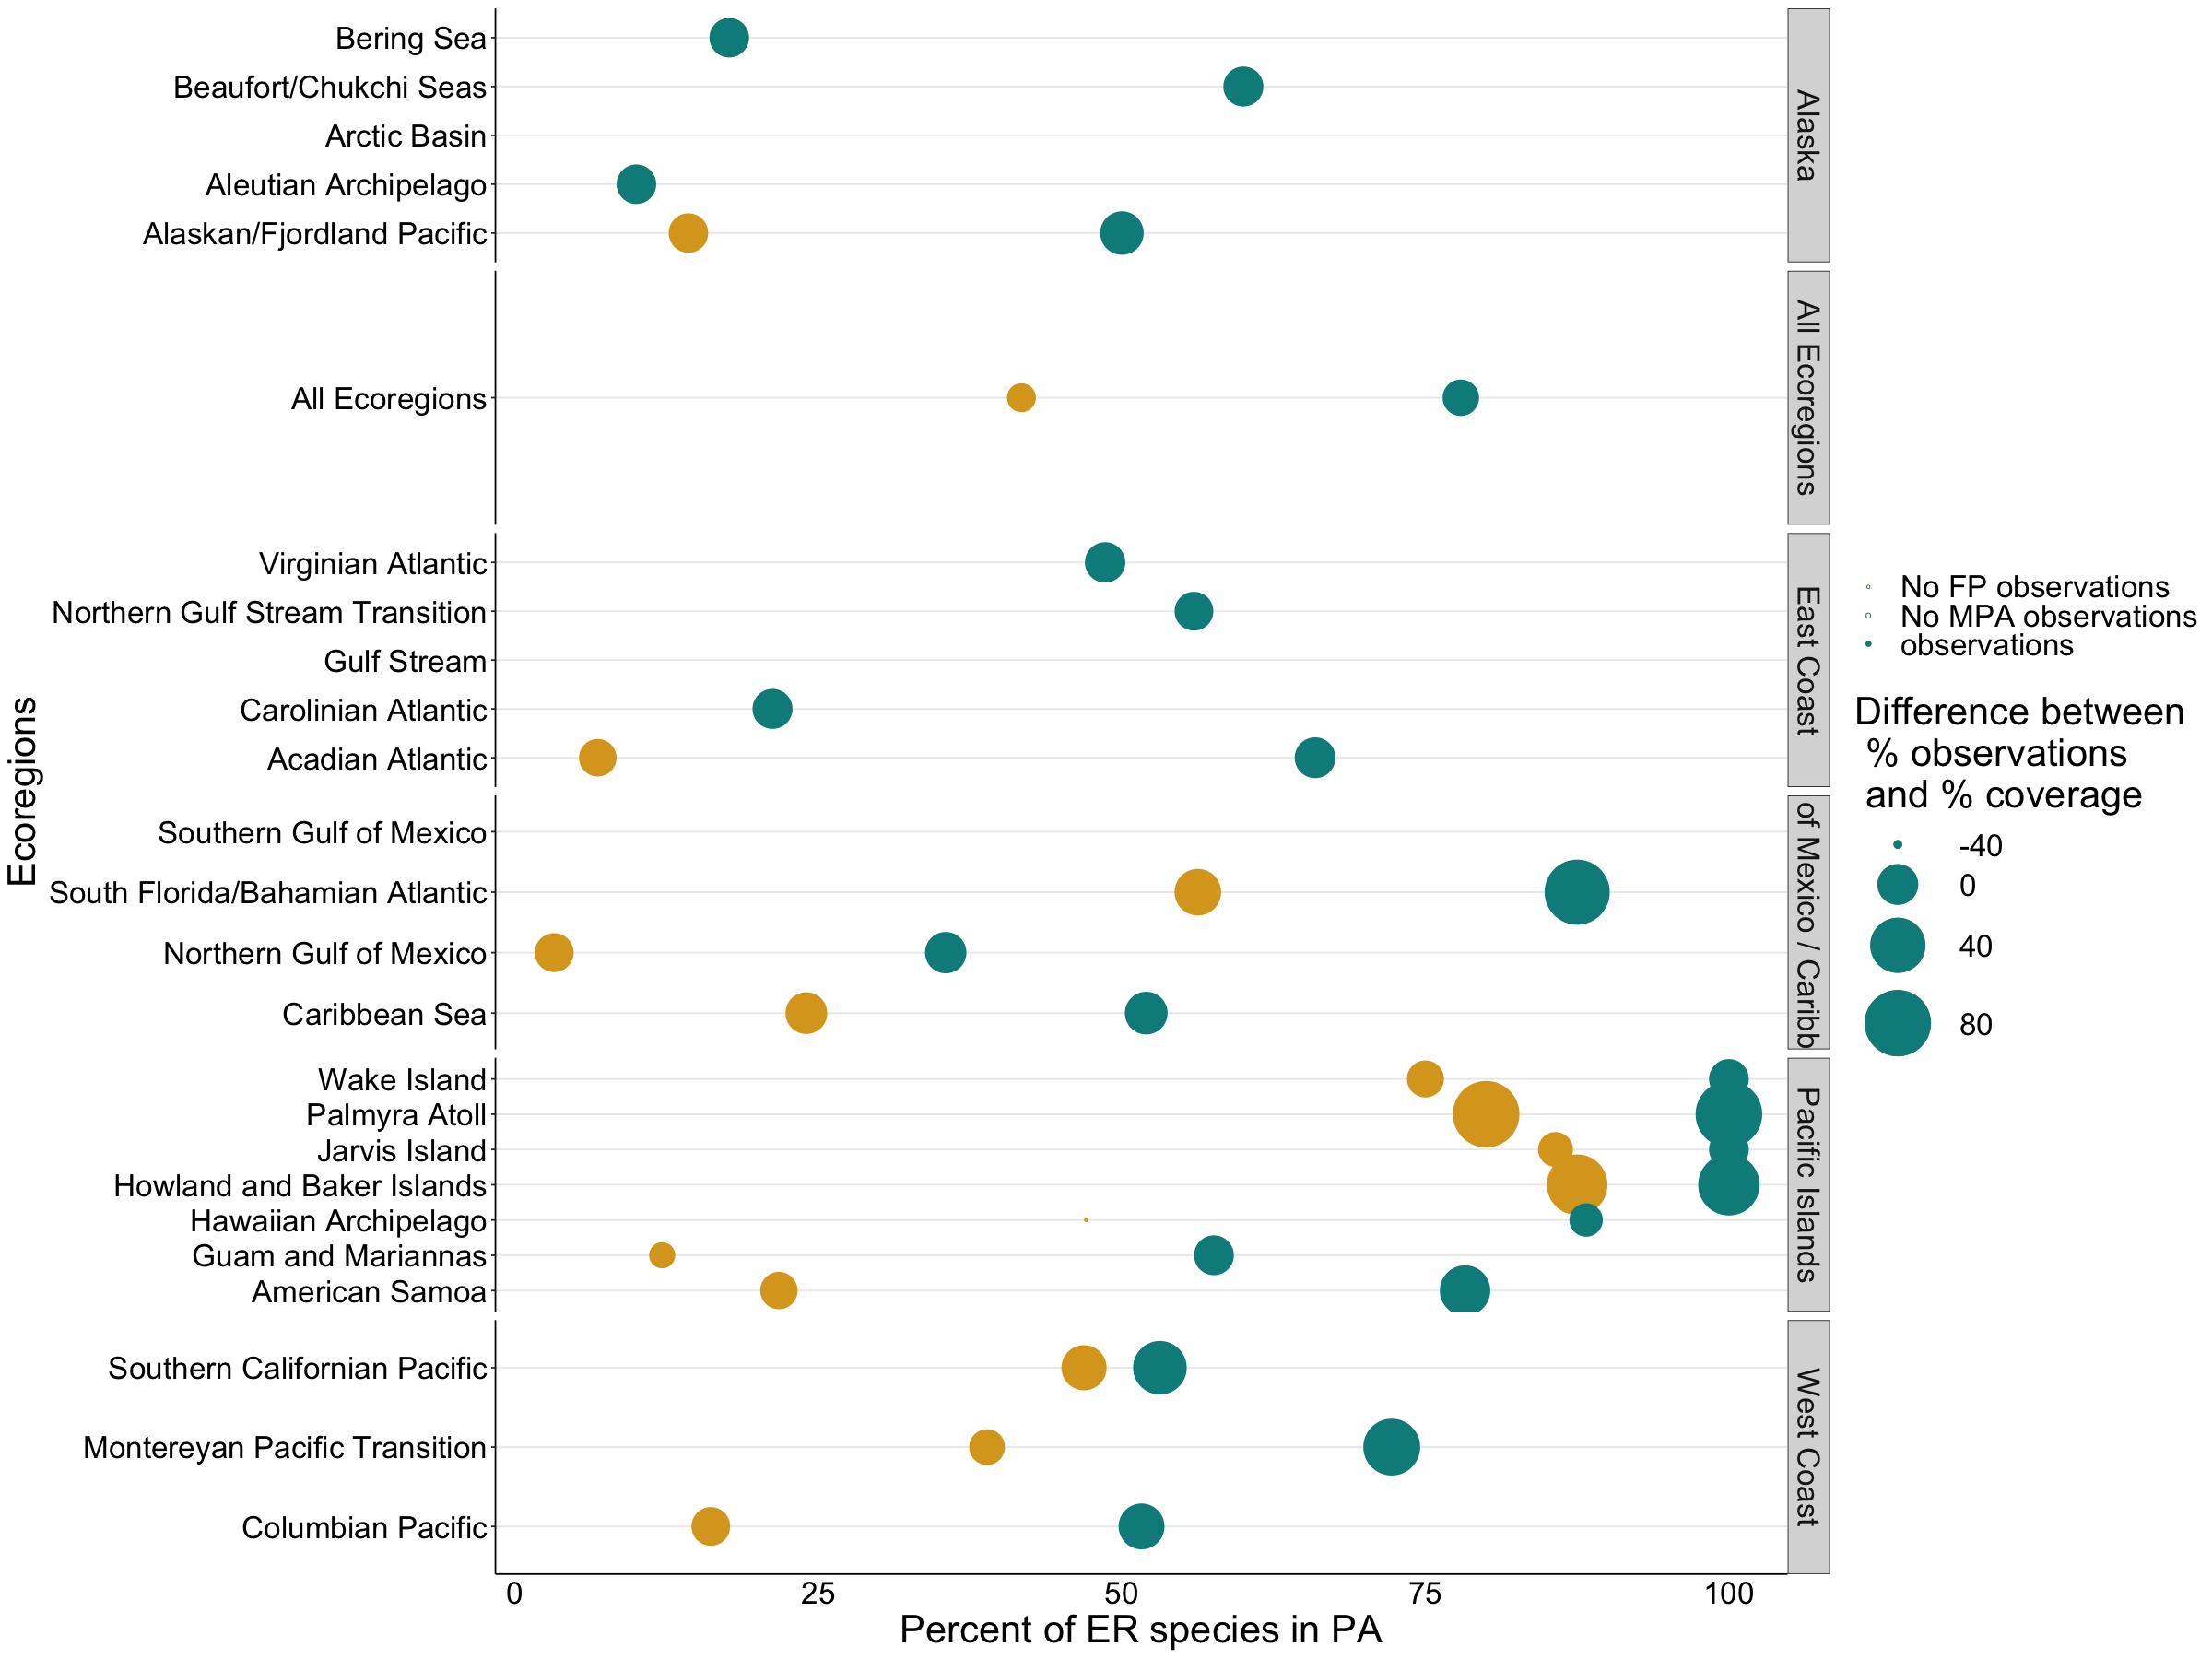

In [76]:
ggplot(richnesscov ) +
    geom_point(color="goldenrod", aes(x = Percent_Redlist_Species_FP_MPA, y = NAME, size=dif_percent_Redlist_FP_obs_cov, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")))+   
geom_point(color="cyan4", aes(x = Percent_Redlist_Species_MPA, y = NAME, size= dif_percent_Redlist_obs_cov, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")))+
scale_size_continuous(range = c(1, 20))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Percent of ER species in PA", shape="", size="Difference between \n % observations \n and % coverage")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

In [77]:
(richnesscov[richnesscov$NAME=="All Ecoregions",])

,NAME,Ecoregion_ID,X,ER_Species.x,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,Percent_Redlist_OBS_MPA,Percent_Redlist_OBS_FP_MPA,Percent_Redlist_Species_MPA,Percent_Redlist_Species_FP_MPA,dif_percent_obs_cov,dif_percent_FP_obs_cov,dif_percent_Redlist_obs_cov,dif_percent_Redlist_FP_obs_cov
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,All Ecoregions,0,24,6970,515741,163,98494,127,26928,68,⋯,26.06726,3.136602,19.09757,5.221225,77.91411,41.71779,15.23861,11.4817,-6.969692,-20.84604


In [110]:
## number of species per area in FP vs MPa
richnesscov$MPA_Redlist_species_area=richnesscov$MPA_RedList_Species/richnesscov$MPA.Coverage.Area
richnesscov$FP_MPA_Redlist_species_area=richnesscov$FP_MPA_RedList_Species/richnesscov$FP.MPA.Coverage.Area

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 7 rows containing missing values (geom_point).”


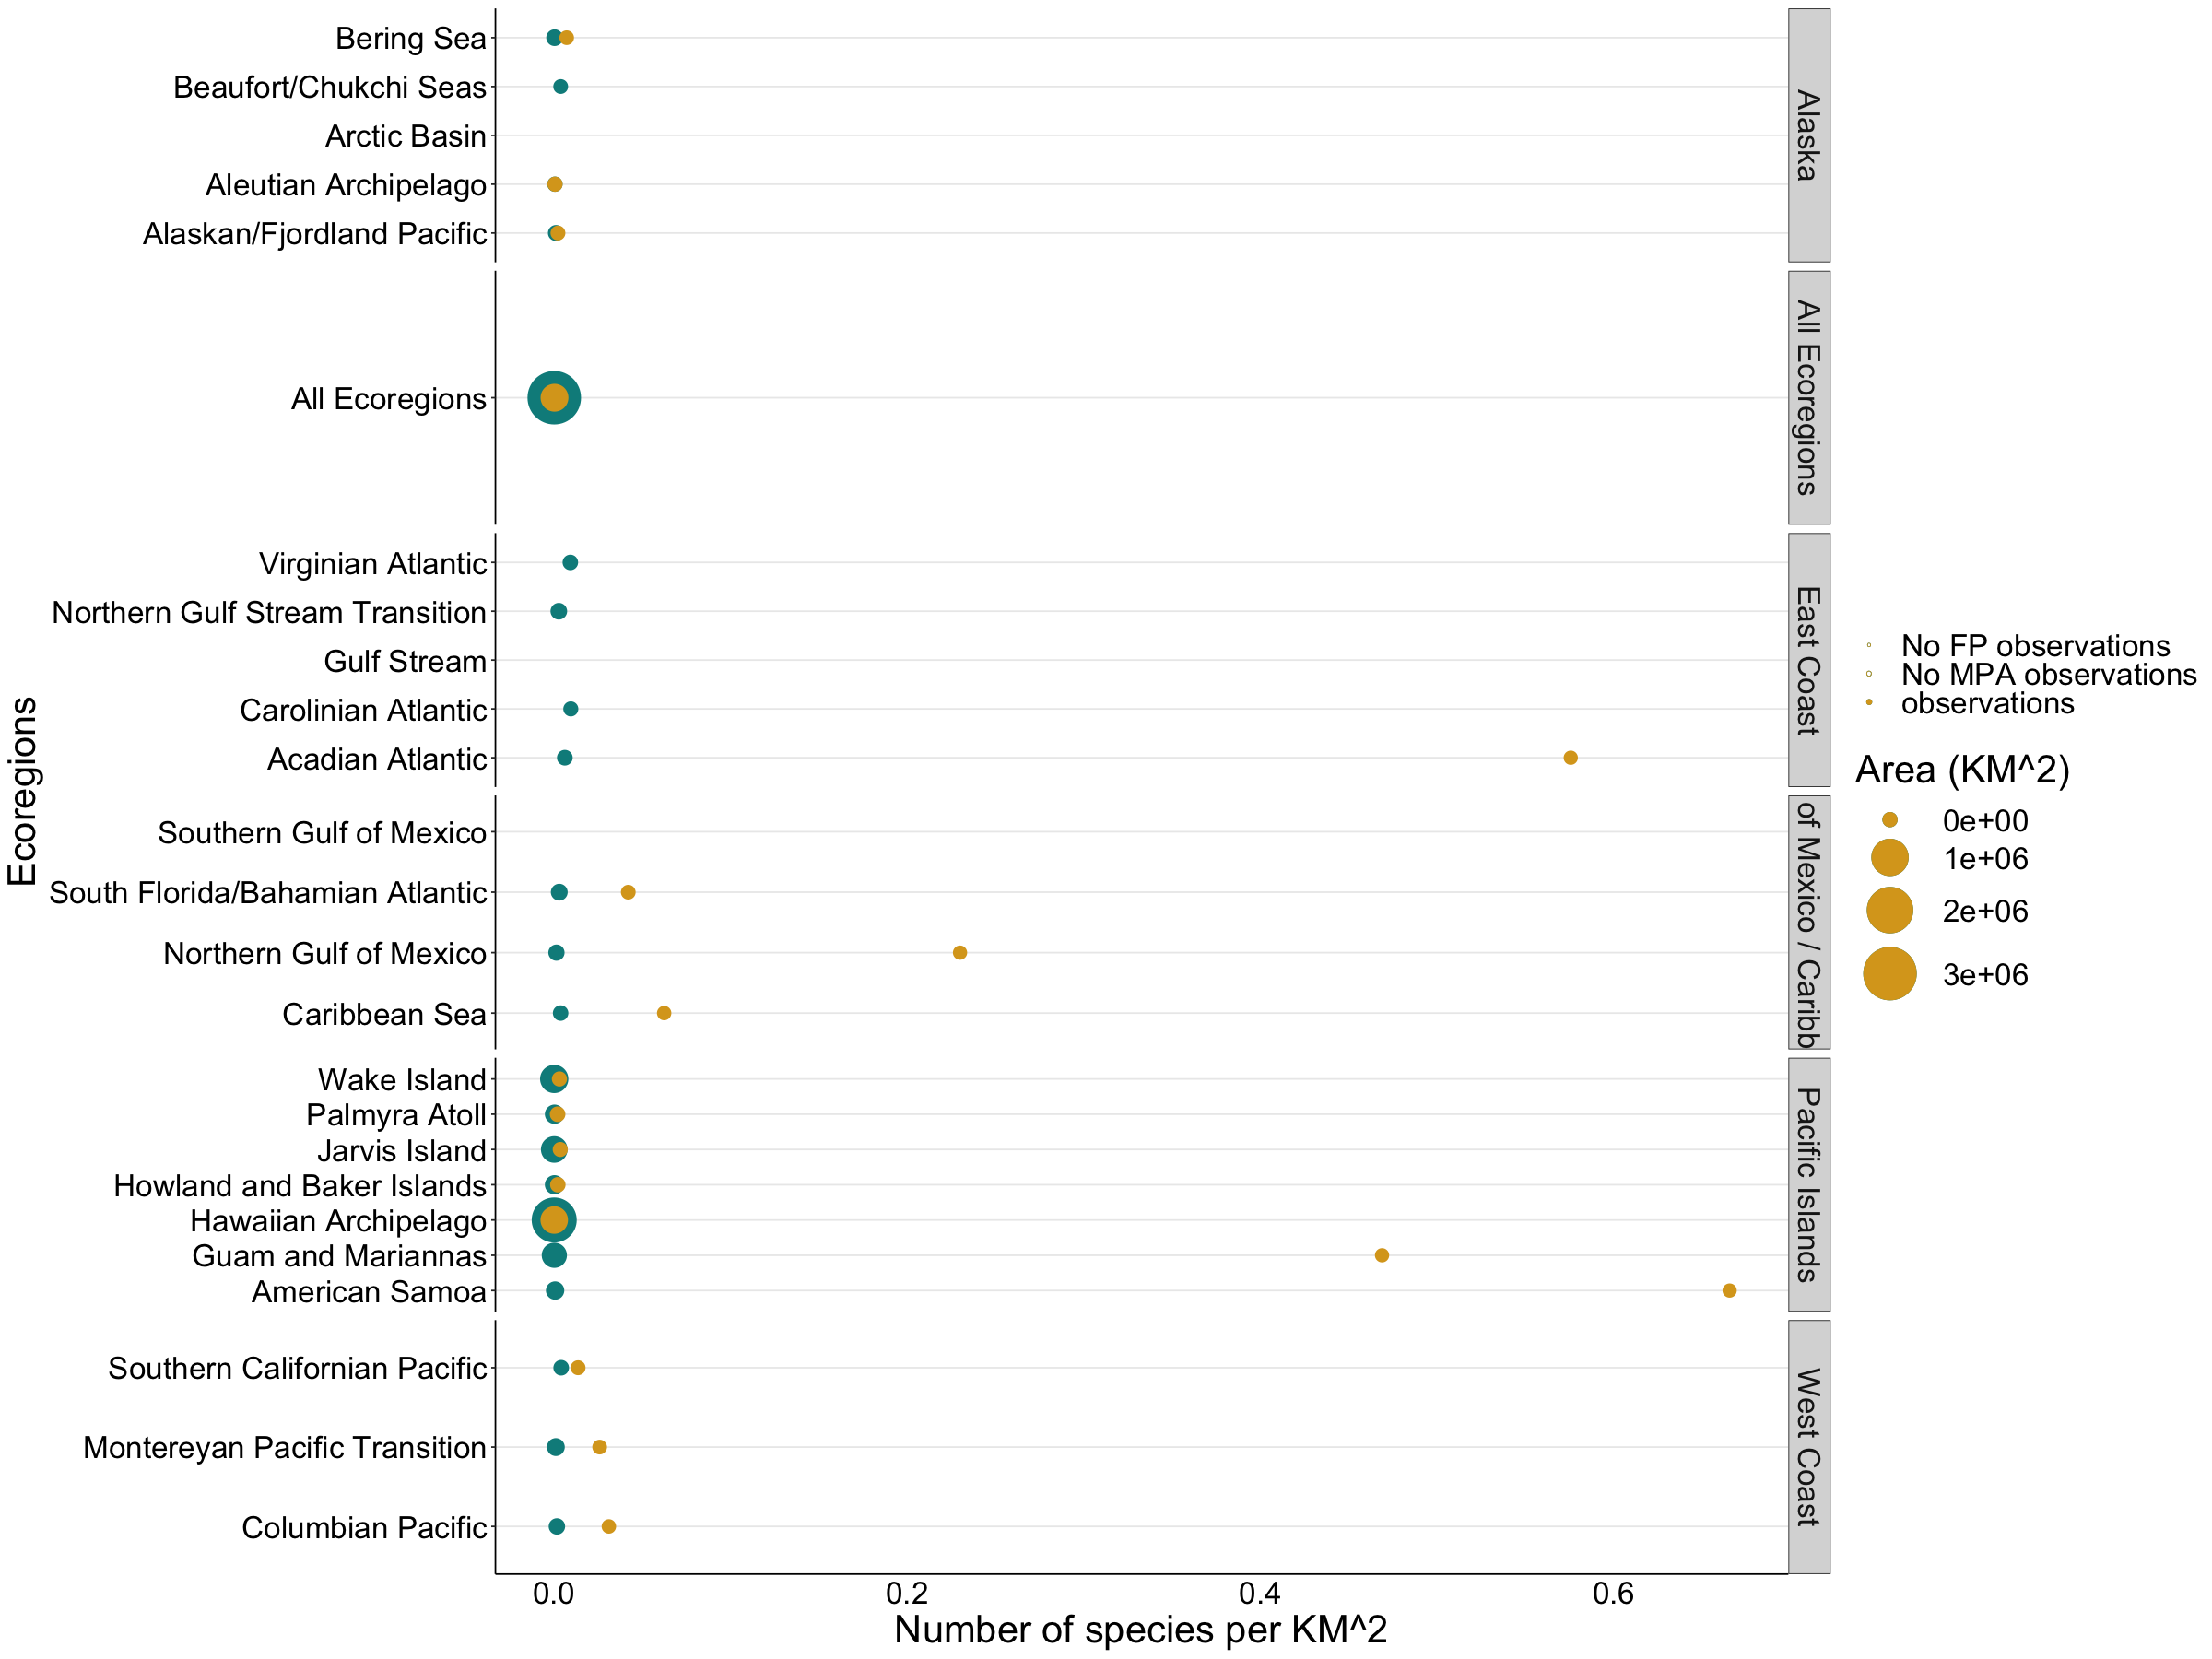

In [113]:
ggplot(richnesscov) +
geom_point(color="cyan4", aes(x = MPA_Redlist_species_area, y = NAME, size= MPA.Coverage.Area, shape=ifelse(MPA.Coverage.Area==0, "No MPA observations", "observations")))+
geom_point(color="goldenrod", aes(x = FP_MPA_Redlist_species_area, y = NAME, size=FP.MPA.Coverage.Area, shape=ifelse(FP.MPA.Coverage.Area==0, "No FP observations", "observations")))+   
scale_size_continuous(range = c(4, 16))+
scale_shape_manual(values=c(111,79, 16))+
       #geom_line()+
facet_grid(Region~., scales="free")+
theme_bw()+
labs(x="Number of species per KM^2", shape="", size="Area (KM^2)")+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25))+
ylab("Ecoregions")

Questions:
What does percent datasets mean (in richness table)?
Why is ER_species in the all obis records 6969 and in the redlist records 7213?
The MPA numbers include the FPA numbers, right? is that true for all datasets?
What does depth mean diff mean? is it the mean outside-mean inside mpas? 
why doesnt the IBA data include all of the ecoregions?

In [33]:
(coverage)

Ecoregion_ID,NAME,ER.Area,MPA.Coverage.Area,FP.MPA.Coverage.Area,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,All Ecoregions,12223708.27,3186386.0527,3.834091e+05,26.0672619,3.136602e+00
13,Hawaiian Archipelago,2923629.35,1956311.9155,3.660015e+05,66.9138143,1.251874e+01
2,Alaskan/Fjordland Pacific,1701319.78,7022.8311,9.414154e+02,0.4127872,5.533442e-02
7,Bering Sea,1295111.91,12889.5145,4.251868e+02,0.9952433,3.283012e-02
11,Guam and Mariannas,974230.27,248540.8682,8.534623e+00,25.5115117,8.760376e-04
17,Northern Gulf of Mexico,510220.82,8628.6307,4.352292e+00,1.6911561,8.530213e-04
10,Columbian Pacific,445698.93,10434.7214,1.615267e+02,2.3412040,3.624122e-02
14,Howland and Baker Islands,435165.46,52000.4473,3.404044e+03,11.9495805,7.822413e-01
24,Wake Island,408528.99,407628.2706,2.024913e+03,99.7795219,4.956597e-01


In [36]:
richnesscov

Ecoregion_ID,NAME,ER_Species,X,ER_RedList_Obs,ER_RedList_Species,MPA_RedList_Obs,MPA_RedList_Species,FP_MPA_RedList_Obs,FP_MPA_RedList_Species,⋯,PCT.Covered.by.MPA,PCT.Covered.by.FP.MPA,Percent_Redlist_OBS_MPA,Percent_Redlist_OBS_FP_MPA,Percent_Redlist_Species_MPA,Percent_Redlist_Species_FP_MPA,dif_percent_obs_cov,dif_percent_FP_obs_cov,dif_percent_Redlist_obs_cov,dif_percent_Redlist_FP_obs_cov
<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Acadian Atlantic,600,0,85551,44,6463,29,46,3,⋯,4.7823623,0.005173248,7.5545581,0.05376910,65.90909,6.818182,5.1483831,0.008384824,2.7721958,-4.7285932
10,Columbian Pacific,953,9,21855,31,3935,16,36,5,⋯,2.3412040,0.036241224,18.0050332,0.16472203,51.61290,16.129032,18.6760660,0.102794323,15.6638291,-2.1764820
11,Guam and Mariannas,898,10,1258,33,326,19,6,4,⋯,25.5115117,0.000876038,25.9141494,0.47694754,57.57576,12.121212,10.3466806,3.057613873,0.4026377,-25.0345642
12,Gulf Stream,200,11,13568,25,NA,NA,NA,NA,⋯,0.0000000,0.000000000,NA,NA,NA,NA,0.0000000,0.000000000,NA,NA
13,Hawaiian Archipelago,801,12,2524,17,1360,15,670,8,⋯,66.9138143,12.518737290,53.8827258,26.54516640,88.23529,47.058824,5.5082638,43.540414210,-13.0310885,-40.3686479
14,Howland and Baker Islands,354,13,515,8,398,8,382,7,⋯,11.9495804,0.782241308,77.2815534,74.17475728,100.00000,87.500000,87.7957823,98.890663632,65.3319729,62.2251768
15,Jarvis Island,266,14,827,7,826,7,740,6,⋯,99.6905094,0.551063094,99.8790810,89.48004837,100.00000,85.714286,0.3071520,99.233792616,0.1885716,-10.2104611
16,Montereyan Pacific Transition,1189,15,15073,36,8952,26,264,14,⋯,10.2426886,0.197937742,59.3909640,1.75147615,72.22222,38.888889,50.7153793,1.016015334,49.1482753,-8.4912125
17,Northern Gulf of Mexico,1336,16,27269,31,1579,11,8,1,⋯,1.6911561,0.000853021,5.7904580,0.02933734,35.48387,3.225806,8.2134979,0.000298004,4.0993019,-1.6618188
